# Exploratory Data Analysis (EDA)
## Loan Approval Risk Patterns & Model Justification

This notebook explores key patterns in the loan approval dataset to:
- Understand approval vs rejection behavior
- Identify risk-driving features
- Justify the use of tree-based models
- Support failure analysis decisions

The focus is **business insight**, not visual complexity.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

DATA_PATH = "../ml/data/loan_approval_data.csv"

df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip()

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [2]:
df.shape

df.info()

df['loan_status'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

- The dataset contains both approved and rejected loans.
- The target is moderately imbalanced, making accuracy an unreliable metric.
- Risk-based evaluation is more appropriate.


In [3]:
df = df.drop("loan_id", axis=1)


In [4]:
df['loan_status_num'] = df['loan_status'].map({
    "Approved": 1,
    "Rejected": 0
})


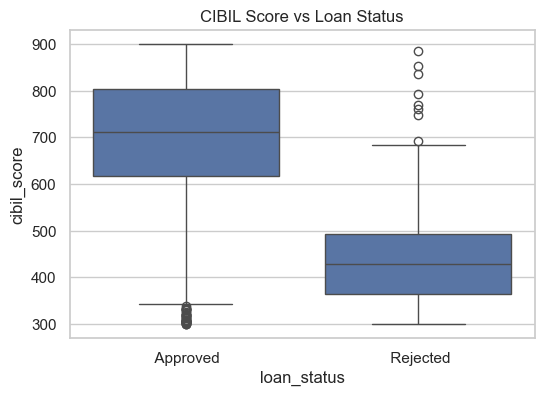

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title("CIBIL Score vs Loan Status")
plt.show()


Rejected loans tend to have significantly lower CIBIL scores.
This confirms credit score as a strong risk indicator.


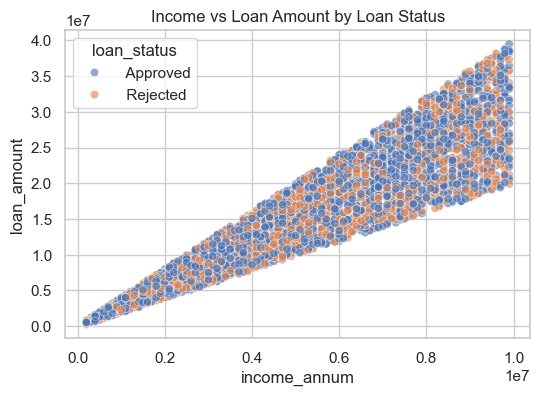

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='income_annum',
    y='loan_amount',
    hue='loan_status',
    data=df,
    alpha=0.6
)
plt.title("Income vs Loan Amount by Loan Status")
plt.show()


Rejected loans often appear in regions where loan amount is high relative to income.
This suggests ratio-based risk rather than absolute thresholds.


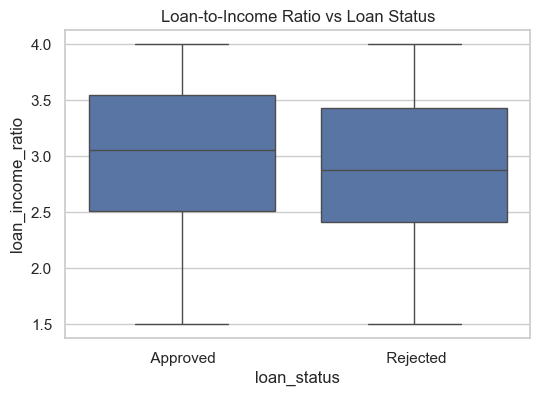

In [7]:
df['loan_income_ratio'] = df['loan_amount'] / df['income_annum']

plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='loan_income_ratio', data=df)
plt.title("Loan-to-Income Ratio vs Loan Status")
plt.show()


Higher loan-to-income ratios are strongly associated with rejection.
Tree-based models can naturally capture such threshold-based decisions.


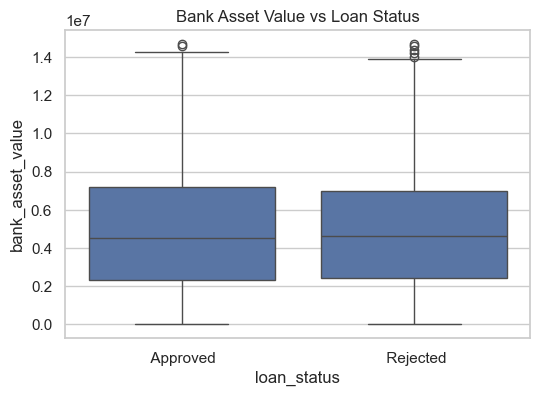

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='bank_asset_value', data=df)
plt.title("Bank Asset Value vs Loan Status")
plt.show()


Applicants with higher liquid bank assets are more likely to be approved,
highlighting asset strength as a key approval factor.


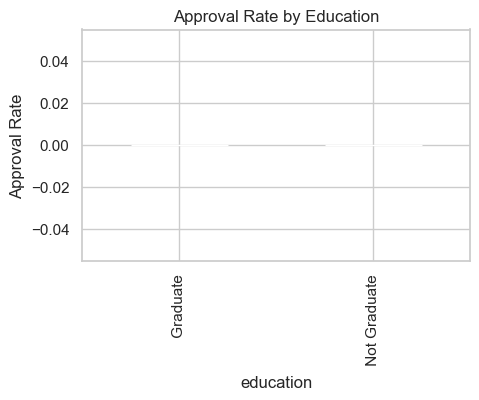

In [9]:
edu_rate = df.groupby("education")["loan_status_num"].mean()

edu_rate.plot(kind="bar", figsize=(5,3), title="Approval Rate by Education")
plt.ylabel("Approval Rate")
plt.show()


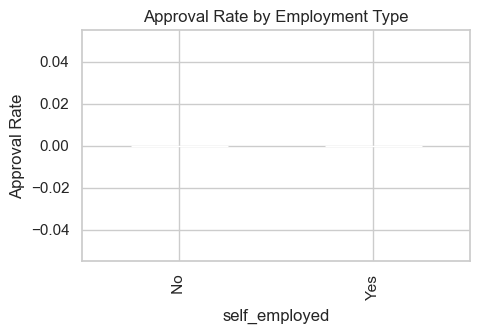

In [10]:
emp_rate = df.groupby("self_employed")["loan_status_num"].mean()

emp_rate.plot(kind="bar", figsize=(5,3), title="Approval Rate by Employment Type")
plt.ylabel("Approval Rate")
plt.show()


Education and employment status have secondary influence compared to
financial and credit-related features.


## Why Tree-Based Models?

EDA reveals that:
- Decision boundaries are **non-linear**
- Risk is driven by **thresholds** (e.g., CIBIL score, loan-to-income ratio)
- Feature interactions matter more than linear relationships

Therefore:
- Decision Trees provide interpretability
- Random Forest reduces variance
- Gradient Boosting corrects residual errors

This justifies the use of tree-based models for this problem.


## EDA Summary

- Credit score and financial ratios are primary risk drivers
- Asset strength significantly influences approvals
- Relationships are non-linear and threshold-based
- Failure analysis should focus on risky approvals

These insights directly inform model design and evaluation strategy.
